# Implementando e Avaliando o Modelo de Regressão Linear Simples

O que é regressão?

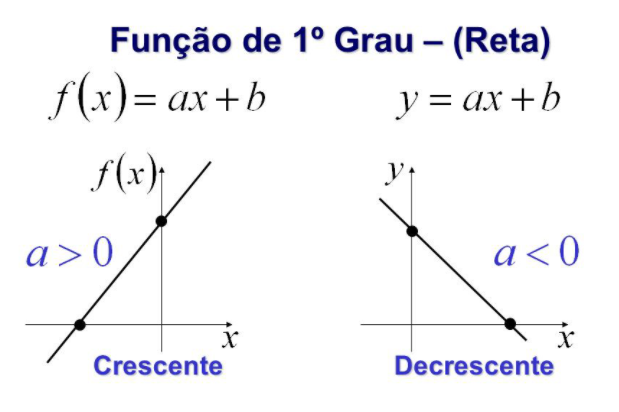

- Variável preditora X
- Variável dependente Y

Quais são os valores de **a** e **b**?

- METÓDOS DOS MÍNIMOS QUADRADOS

**Avaliação dos modelos**

- Teste F de Significância global

- Teste de Significância individuais ou p-values dos coeficientes

- Coeficiente R²

Soma Total dos Quadrados (STQ)

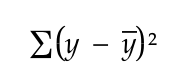

Soma dos Quadrados dos Resíduos (SQU)

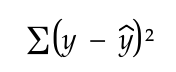

Soma dos Quadrados de Regressão (SQR)

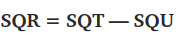

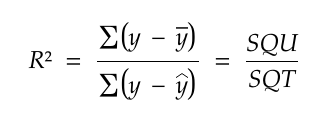

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [2]:
# fonte: http://www.portalaction.com.br/analise-de-regressao/12-estimacao-dos-parametros-do-modelo

**statsmodel**

In [3]:
# variável preditora
X = np.array([ 220, 220, 220, 220, 220, 225, 225, 225, 225, 225, 230, 230, 230, 230, 230, 235, 235, 235, 235, 235 ])
# variável alvo
y = np.array([ 137, 137, 137, 136, 135, 135, 133, 132, 133, 133, 128, 124, 126, 129, 126, 122, 122, 122, 119, 122 ])


In [5]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     291.1
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.47e-12
Time:                        13:21:22   Log-Likelihood:                -35.596
No. Observations:                  20   AIC:                             75.19
Df Residuals:                      18   BIC:                             77.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        364.1800     13.765     26.457      0.000     335.261     393.099
x1            -1.0320      0.060    -17.062      0.000      -1.159      -0.905
==============================================================================
Omnibus:                        0.433   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.115
Skew:                          -0.182   Prob(JB):                        0.944
Kurtosis:                       2.926   Cond. No.                     9.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# mostrando as previsões para o mesmo conjunto passado
results.predict(X_sm)

array([137.14, 137.14, 137.14, 137.14, 137.14, 131.98, 131.98, 131.98,
       131.98, 131.98, 126.82, 126.82, 126.82, 126.82, 126.82, 121.66,
       121.66, 121.66, 121.66, 121.66])

**scikit-learn**

In [10]:
df = pd.DataFrame()
df['x'] = X
df['y'] = y
# passando os valores de x e y como Dataframes
x_v = df[['x']]
y_v = df[['y']]
# criando e treinando o modelo
model = LinearRegression()
model.fit(x_v, y_v)
# para visualizar os coeficientes encontrados
model.coef_


array([[-1.032]])

In [21]:
# para visualizar o R²
model.score(x_v,y_v)

0.9417657045840407

In [ ]:
class SimpleLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.formula = None
        self.X = None
        self.y = None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.X = X
        self.y = y
        soma_xy = sum(X * y)
        soma_x_ao_quadrado = sum(X * X)
        soma_x = sum(X)
        soma_y = sum(y)
        n = len(X)
        media_x = X.mean()
        media_y = y.mean()
        
        # build formula y = ax + b
        a = ( soma_xy - n * media_x * media_y ) / ( soma_x_ao_quadrado - n * ( media_x ** 2 ) )
        b = media_y - (a * media_x)
        
        self.coef_ = np.array([ b ])
        self.intercept_ = np.array([ a ])
        
        self.formula = lambda _x : (a * _x) + b
    
    def predict(self, x):
        return np.array(list(map(self.formula, x)))
    
    # fonte: https://edisciplinas.usp.br/pluginfile.php/1479289/mod_resource/content/0/regr_lin.pdf
    def sum_total_quadratic(self):
        median = self.y.mean()
        return sum( ( y - median ) ** 2 )
    
    def sum_error_quadratic(self):
        predicted = self.predict(x=self.X)
        return sum( ( self.y - predicted ) ** 2 )

    def regression_quadratic_sum(self):
        return self.sum_total_quadratic() - self.sum_error_quadratic()
    
    def score(self):
        return self.regression_quadratic_sum() / self.sum_total_quadratic()